In [1]:
import os
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle
with open('..\\examples\mountain_car\\mountain_car.pickle', "rb") as infile:
    episodes = pickle.load(infile)
print(len(episodes), "episodes loaded.")
episodes[0].keys()

50 episodes loaded.


dict_keys(['observations', 'actions', 'action_infos'])

In [4]:
max_x = [max([ob[0] for ob in episode['observations']]) for episode in episodes]
# print("Max x", max_x)

human_inputs = [len([info for info in episode['action_infos'] if info=="human"]) for episode in episodes]
# print("Num human inputs", human_inputs)

ensemble_inputs = [len([info for info in episode['action_infos'] if info==True]) for episode in episodes]
# print("Num sccessful ensemble inputs", ensemble_inputs)

failed_ensemble_inputs = [len([info for info in episode['action_infos'] if info==False]) for episode in episodes]
# print("Num failed ensemble inputs", failed_ensemble_inputs)

random_inputs = [len([info for info in episode['action_infos'] if info==None]) for episode in episodes]
# print('Random inputs', random_inputs)

episode_lengths = [len(episode['actions']) for episode in episodes]
# print('Episode lengths', episode_lengths)

# Number of good human actions, i.e., when sign of velocity is same as the direction of input
good_human_inputs = [len([ (a, ob, info) for a, ob, info in zip(episode['actions'], episode['observations'], episode['action_infos']) if info == "human" and (a - 1)*ob[0] >= 0]) for episode in episodes]
# print('"Good" human inputs count', good_human_inputs)

# Number of good ensemble actions, i.e., when sign of velocity is same as the direction of input
good_ensemble_inputs = [len([ (a, ob, info) for a, ob, info in zip(episode['actions'], episode['observations'], episode['action_infos']) if info == True and (a - 1)*ob[0] >= 0]) for episode in episodes]
# print('Good ensemble inputs count', good_ensemble_inputs)

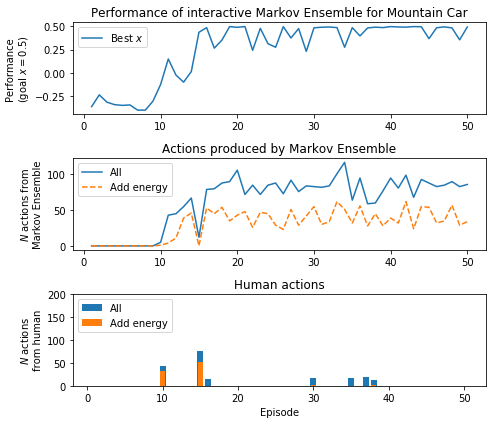

In [5]:
t = range(1, len(max_x) + 1)

# fig, ax = plt.subplots(figsize=(12,7))
fig, ax = plt.subplots(figsize=(7,6))

ax1 = plt.subplot(3, 1, 1)
# color = 'red'
ax1.set_ylabel('Performance\n(goal $x = 0.5$)')
ax1.plot(t, max_x, label="Best $x$")
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
plt.title("Performance of interactive Markov Ensemble for Mountain Car")

ax2 = plt.subplot(3, 1, 2)
color = 'tab:red'
ax2.set_ylabel('$N$ actions from\nMarkov Ensemble')  # we already handled the x-label with ax1
ax2.plot(t, ensemble_inputs, label='All')
ax2.plot(t, good_ensemble_inputs, label='Add energy', linestyle="--")
ax2.tick_params(axis='y')
ax2.legend()
plt.title("Actions produced by Markov Ensemble")

ax3 = plt.subplot(3, 1, 3)
ax3.set_ylabel('$N$ actions\nfrom human')
ax3.bar(t, human_inputs, label='All')
ax3.bar(t, good_human_inputs, width=0.65, label='Add energy')
ax3.set_ylim([0,200])
ax3.legend(loc='upper left')
ax3.set_xlabel('Episode')
plt.title("Human actions")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('mountain_car.pdf')
plt.savefig('mountain_car.png')
plt.show()
plt.close()

In [6]:
with open('..\\examples\\lunar_lander\\lunar_lander.pickle', "rb") as infile:
    episodes = pickle.load(infile)
print(len(episodes), "episodes loaded.")
episodes[0].keys()

60 episodes loaded.


dict_keys(['observations', 'actions', 'action_infos', 'rewards'])

In [9]:
rewards = [sum(episode['rewards']) for episode in episodes]
# print("Rewards", rewards)

# TODO: detect first human input
ma0 = np.mean(rewards[:10])
# print('ma0:', ma0)
ma1 = [np.mean(rewards[10+i:10+i+10]) for i in range(len(rewards)- 10 - 10)]
# print('ma1:',ma1)

human_inputs = [len([info for info in episode['action_infos'] if info=="human"]) for episode in episodes]
# print("Num human inputs", human_inputs)

ensemble_inputs = [len([info for info in episode['action_infos'] if info==True]) for episode in episodes]
# print("Num sccessful ensemble inputs", ensemble_inputs)

failed_ensemble_inputs = [len([info for info in episode['action_infos'] if info==False]) for episode in episodes]
# print("Num failed ensemble inputs", failed_ensemble_inputs)

random_inputs = [len([info for info in episode['action_infos'] if info==None]) for episode in episodes]
# print('Random inputs', random_inputs)

episode_lengths = [len(episode['actions']) for episode in episodes]
# print('Episode lengths', episode_lengths)

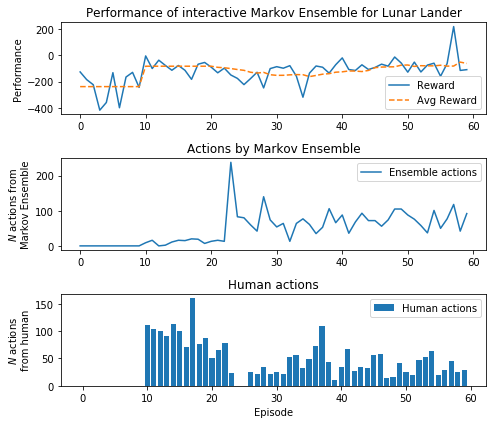

In [11]:
t = range(len(rewards))

# fig, ax = plt.subplots(figsize=(12,7))
fig, ax = plt.subplots(figsize=(7,6))

ax1 = plt.subplot(3, 1, 1)
color = 'red'
ax1.set_ylabel('Performance')
ax1.plot(t, rewards, label="Reward")
ma = [ma0 for _ in range(10)] + [ma1[0] for _ in range(10)] + ma1
# print(ma)
ax1.plot(t, ma, label="Avg Reward", linestyle="--")
# ax1.plot(range(20, len(rewards)), ma1, label="Reward MA(10)", linestyle="--")
ax1.tick_params(axis='y')
ax1.legend(loc='lower right')
plt.title("Performance of interactive Markov Ensemble for Lunar Lander")

ax2 = plt.subplot(3, 1, 2)
color = 'tab:red'
ax2.set_ylabel('$N$ actions from\nMarkov Ensemble')  # we already handled the x-label with ax1
ax2.plot(t, ensemble_inputs, label='Ensemble actions')
# ax2.plot(t, good_ensemble_inputs, label='Ensemble actions: "Good"\n(adding kinetic energy)', linestyle="--")
ax2.tick_params(axis='y')
ax2.legend()
plt.title("Actions by Markov Ensemble")

ax3 = plt.subplot(3, 1, 3)
ax3.set_ylabel('$N$ actions\nfrom human')
ax3.bar(t, human_inputs, label='Human actions')
# ax3.bar(t, good_human_inputs, width=0.65, label='Human actions: "Good"\n(adding kinetic energy)')
# ax3.set_ylim([0,200])
ax3.legend(loc='upper right')
ax3.set_xlabel('Episode')
plt.title("Human actions")

fig.tight_layout()
plt.savefig('lunar_lander.pdf')
plt.savefig('lunar_lander.png')
plt.show()
plt.close()